In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [24]:
data = pd.read_csv("Automobile_data.csv")
data.replace("?",np.nan, inplace = True)
string_col = data.select_dtypes(exclude = np.number)
num_col = data.select_dtypes(include = np.number)

In [25]:
num_col

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [26]:
for i in num_col:
  data[i] = pd.to_numeric(data[i],errors = 'raise')
  data[i].fillna(data[i].median(),inplace = True)

/tmp/ipython-input-2190285452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(),inplace = True)


In [27]:
for i in string_col:
  print(i)
  data[i] = data[i].astype('category').cat.as_unordered()
  data[i].fillna(data[i].mode(),inplace = True)

normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system
bore
stroke
horsepower
peak-rpm
price


/tmp/ipython-input-3201179858.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode(),inplace = True)
/tmp/ipython-input-3201179858.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [28]:
data.dtypes

,0
symboling,int64
normalized-losses,category
make,category
fuel-type,category
aspiration,category
num-of-doors,category
body-style,category
drive-wheels,category
engine-location,category
wheel-base,float64


In [29]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [30]:
for i in data:
  if(str(data[i].dtype)=='category'):
    data[i] = data[i].cat.codes

In [31]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,26,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,-1,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50
2,1,-1,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,50
3,2,27,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,36
4,2,27,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,61


In [32]:
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [33]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.43      1.00      0.60         3
           0       0.56      0.67      0.61        15
           1       0.62      0.56      0.59         9
           2       0.00      0.00      0.00         6
           3       0.20      0.12      0.15         8

    accuracy                           0.46        41
   macro avg       0.36      0.47      0.39        41
weighted avg       0.41      0.46      0.42        41

The F1Score using LR 0.3896284108048814


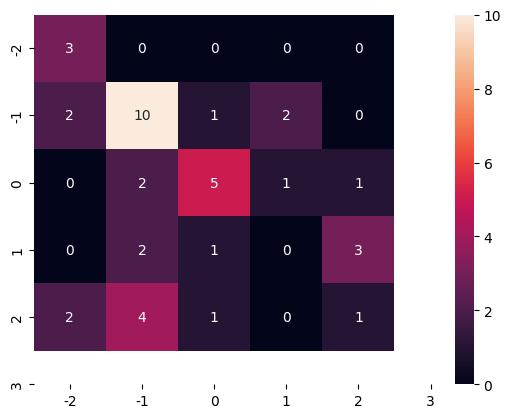

In [34]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), xticklabels=[-2,-1,0,1,2,3], yticklabels = [-2,-1,0,1,2,3],annot = True)
print("The F1Score using LR", f1_score(y_val,y_pred,average= 'macro'))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       1.00      1.00      1.00         3
           0       0.88      0.93      0.90        15
           1       0.78      0.78      0.78         9
           2       0.83      0.83      0.83         6
           3       1.00      0.75      0.86         8

    accuracy                           0.85        41
   macro avg       0.75      0.72      0.73        41
weighted avg       0.88      0.85      0.86        41

The F1Score using DT 0.7285799624509303


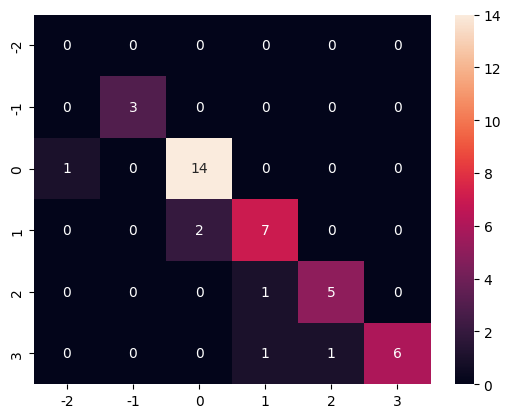

In [35]:
dt = DecisionTreeClassifier(min_samples_split=2)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), xticklabels=[-2,-1,0,1,2,3], yticklabels = [-2,-1,0,1,2,3],annot = True)
print("The F1Score using DT", f1_score(y_val,y_pred,average= 'macro'))

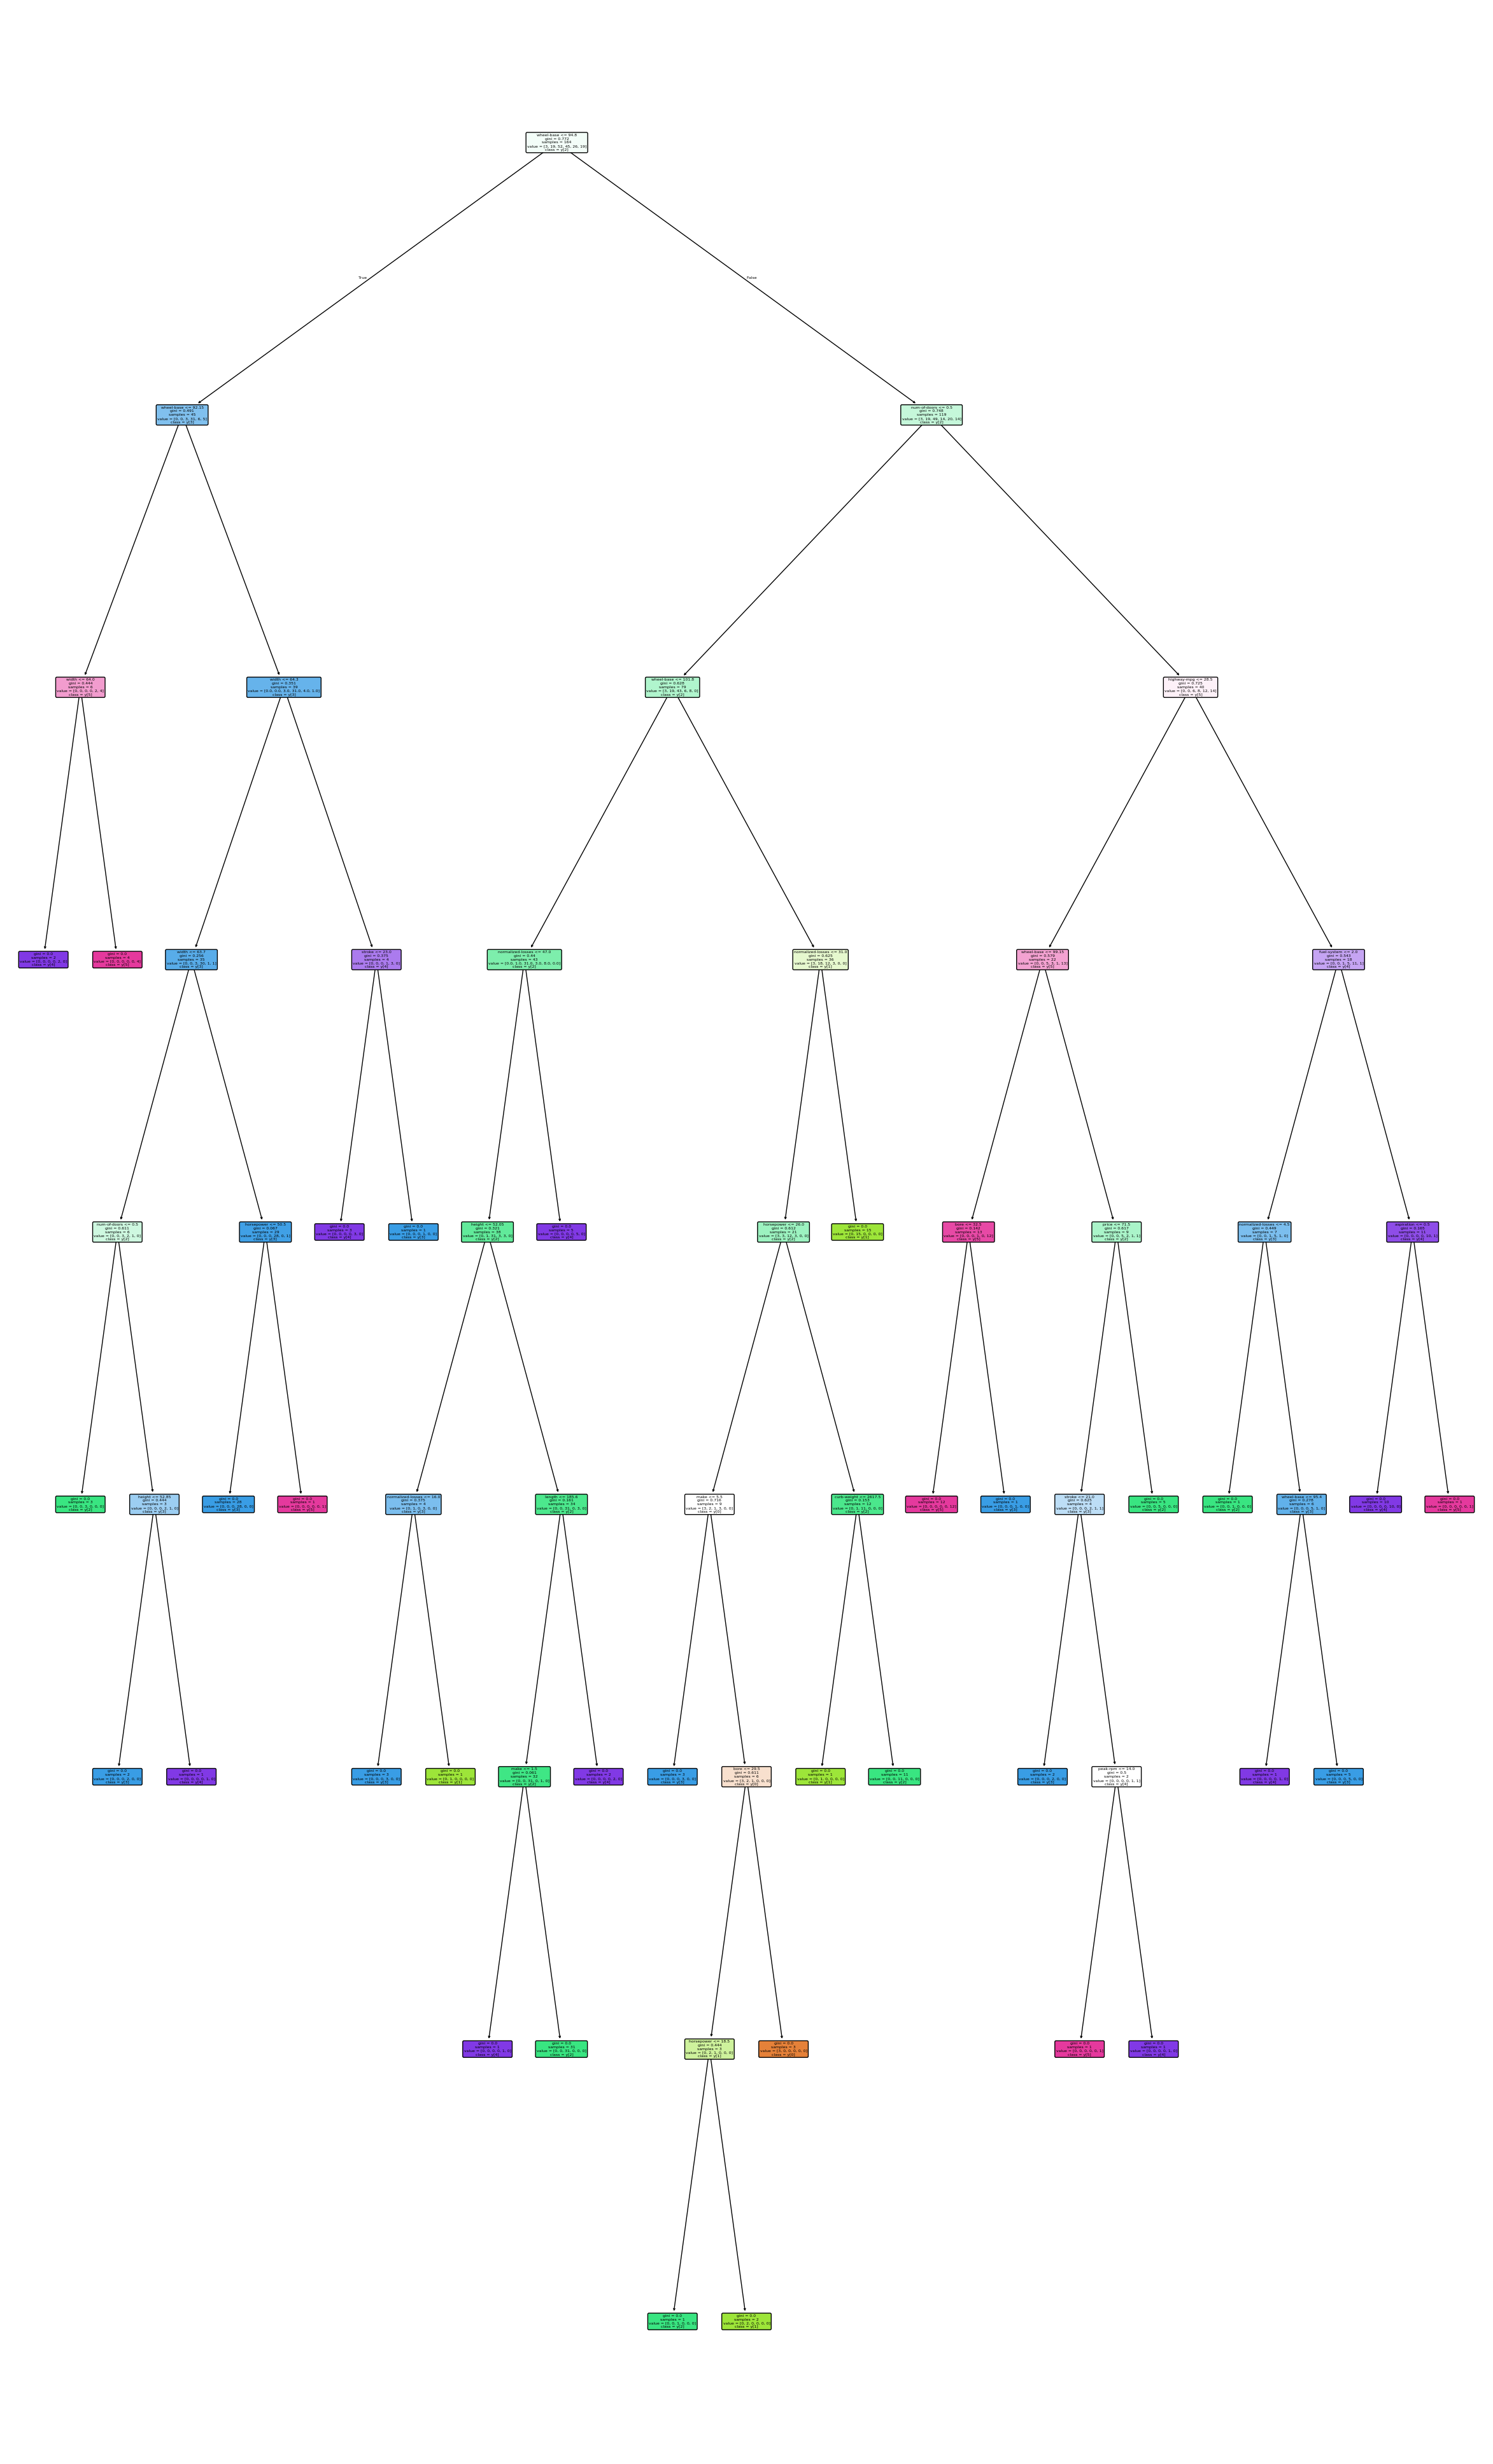

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,50))
plot_tree(dt, feature_names = X.columns, class_names =True, filled = True, rounded = True)
plt.show()

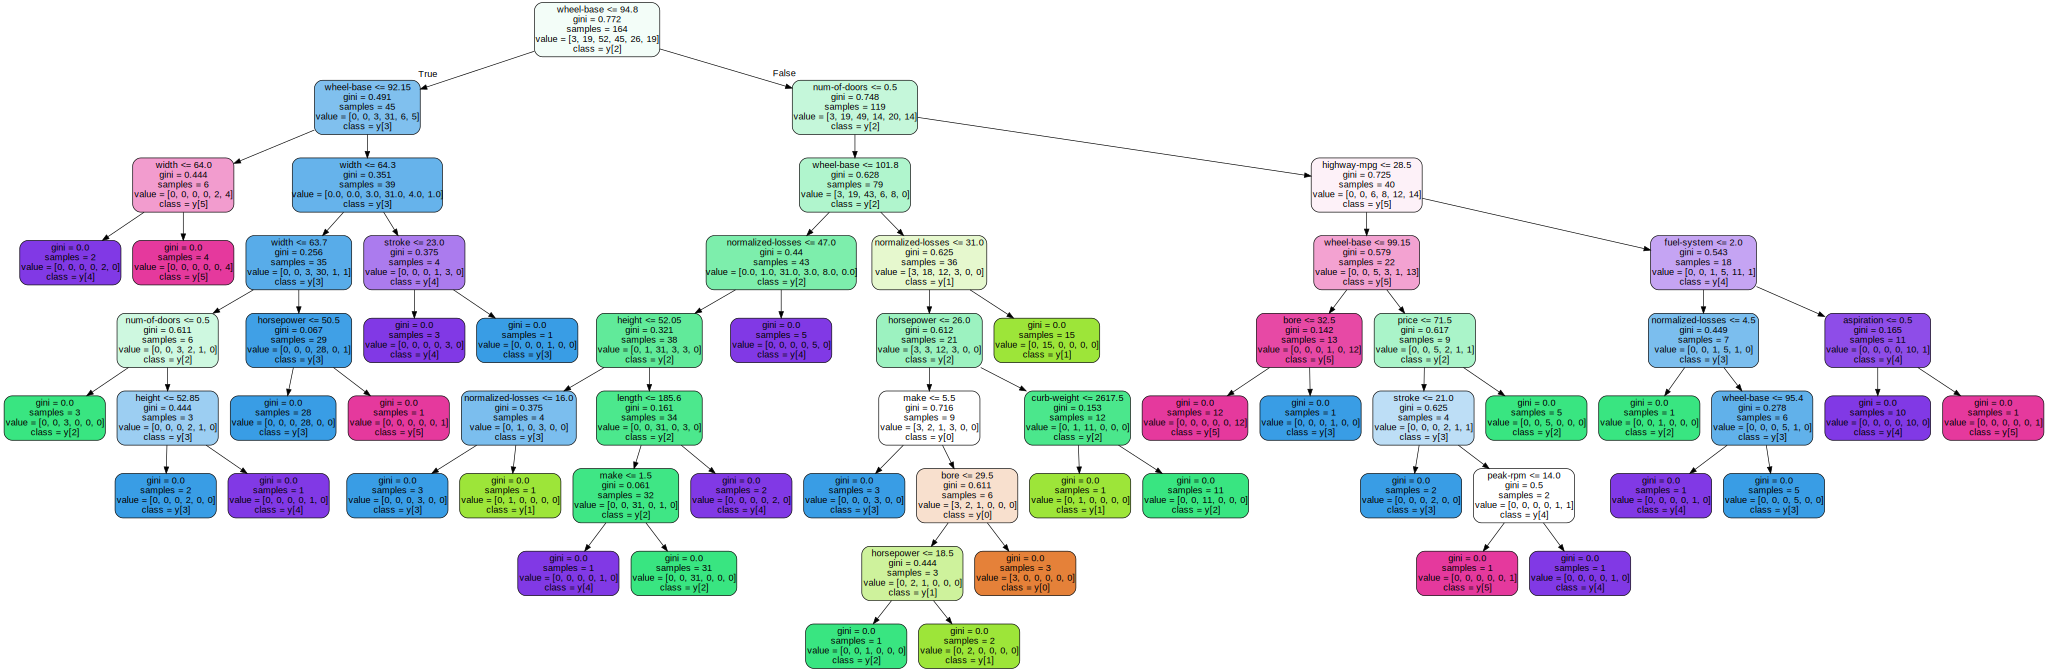

In [37]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(dt, out_file = None, feature_names = X.columns, class_names =True, filled = True, rounded = True)
graph = graphviz.Source(dot)
graph.render('dt', format = 'png')
graph

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         3
           0       0.88      0.93      0.90        15
           1       0.70      0.78      0.74         9
           2       0.67      0.67      0.67         6
           3       0.80      0.50      0.62         8

    accuracy                           0.78        41
   macro avg       0.76      0.78      0.76        41
weighted avg       0.78      0.78      0.77        41

The F1Score using DT 0.755852410181782


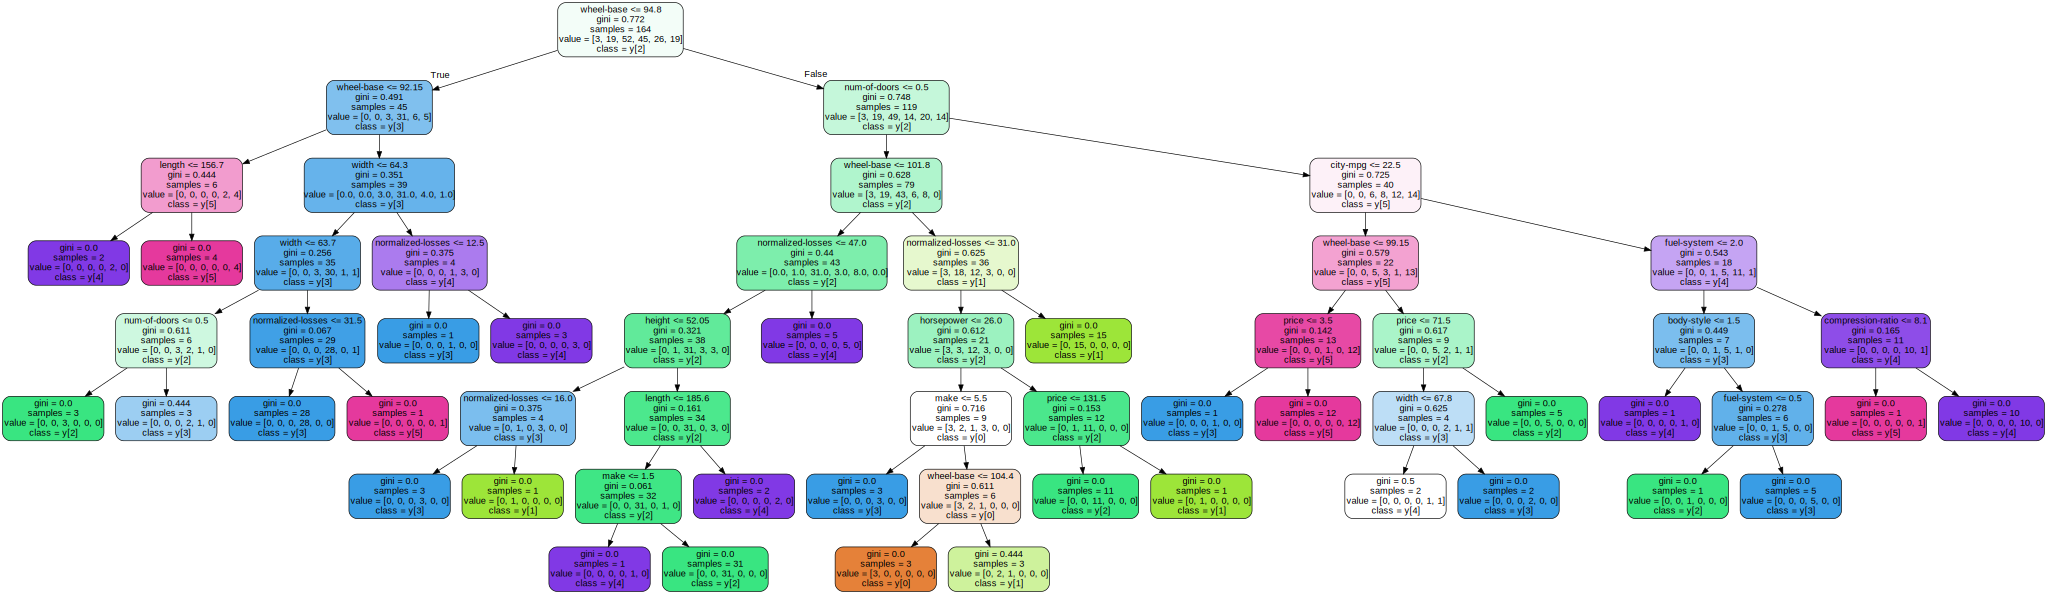

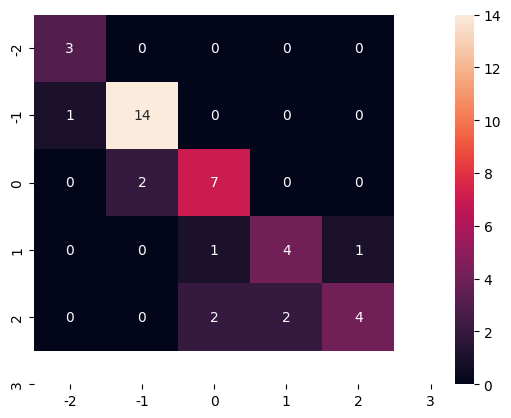

In [38]:
dt = DecisionTreeClassifier(min_samples_split=4)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), xticklabels=[-2,-1,0,1,2,3], yticklabels = [-2,-1,0,1,2,3],annot = True)
print("The F1Score using DT", f1_score(y_val,y_pred,average= 'macro'))

from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(dt, out_file = None, feature_names = X.columns, class_names =True, filled = True, rounded = True)
graph = graphviz.Source(dot)
graph.render('dt', format = 'png')
graph

criterion{“gini”, “entropy”, “log_loss”}, default=”

1.  gini
    ”The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

    gini - faster, default, works great 90%
    entropy - sometimes for imbalanced data

2.  splitter{“best”, “random”}, default=”best”
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

    BEST FINDS THE BEST SPLIT

3.  max_depth int, default=None
    "How many questions can my tree ask?"
    
    None - Max memorization
    5 - Learns good patterns
    2 - Very Simple, may underfit

4. min_samples_split int, default=2
   "How many samples minimum should be present before I go on to ask the next question?"
   lower -> More Splits -> Overfitting
   higher -> fewer splits -> smoother tree / underfit

5. min_samples_leaf int:
   "How many samples end up in eachh of the final leaf / result group"
   
   Small(1-2) -> Detailed Tree
   Bigger (5-20) -> Smoother tree / may underfit

6. max_features: help overfitting - Number of features / X variables to consider for each split

7. max_leaf_nodes int: Final number of leaves you want..
  Fewer leaves - Simpler Lesser overfitting
  More leaves - More complex

8. ccp_alpha -> Post pruning parameter
  0.0 - No pruning
  > 0 - More pruning



In [39]:
import numpy as np
import pandas as pd
from sklearn.tree import _criterion

In [41]:
def sklearn_root_gini(X,y):
  result = []
  y = np.asarray(y)

  classes = np.unique(y)
  n_classes = len(classes)

  class_index = {cls:i for i,cls in enumerate(classes)}
  y_encoded = np.array([class_index[i] for i in y])

  for feature in X.columns:
    values = np.asarray(X[feature])
    order = np.argsort(values)
    values_sorted = values[order]
    y_sorted = y_encoded[order]
    #y_encoded = y_encoded[order]

    right_counts = np.bincount(y_encoded, minlength = n_classes).astype(float)
    left_counts = np.zeros(n_classes)

    best_gini = 1.0
    best_threshold = None

    for i in range(len(values_sorted) -1):
      cls = y_sorted[i]
      left_counts[cls]+=1
      right_counts[cls]-=1

      if values_sorted[i] == values_sorted[i+1]:
        continue

      threshold = (values_sorted[i] + values_sorted[i+1])/2
      left_total = i+1
      right_total = len(y_sorted)-left_total

      #Gini left
      p_left = left_counts/left_total
      g_left = 1.0-np.sum(p_left**2)

      #Gini right
      p_right = right_counts/right_total
      g_right = 1.0-np.sum(p_right**2)

      #weighted gini after split
      g_split = (left_total / len(y_sorted))*g_left + (right_total / len(y_sorted))*g_right

      if g_split < best_gini:
        best_gini= g_split
        best_threshold = threshold

      result.append((feature, best_gini, best_threshold))
  results = pd.DataFrame(result, columns = ['feature','gini','threshold'])
  return results.sort_values("gini")

In [43]:
results = sklearn_root_gini(x_train, y_train)
results.drop_duplicates()

,feature,gini,threshold
89,wheel-base,0.677730,94.8
73,num-of-doors,0.684609,0.5
225,width,0.685290,64.3
383,curb-weight,0.699867,2206.5
315,curb-weight,0.700783,2045.0
...,...,...,...
680,highway-mpg,0.768218,16.5
578,horsepower,0.768744,-0.5
631,peak-rpm,0.768744,-0.5
72,num-of-doors,0.770175,-0.5


In [46]:
fi = pd.DataFrame({"Feature":X.columns, "Importances": dt.feature_importances_}).sort_values(by="Importances",ascending = False)
fi
#IF splitting on this column does it make my data decision purer..
#importance = total impurity reduction contributed by the feature
#Importance(F) += (Impurity_parent - impurity_lef_child - impurity_right_child) x (samples_at_node / total_samples)

,Feature,Importances
8,wheel-base,0.301352
0,normalized-losses,0.173233
4,num-of-doors,0.103699
10,width,0.065853
24,price,0.054793
22,city-mpg,0.052839
16,fuel-system,0.052745
9,length,0.050438
11,height,0.042629
1,make,0.038361


In [47]:
#Feature importance tells how much each feature contributed to reducing (Gini/Entropy)
#While building the tree
#could be used as feature selection technique like correlation

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [49]:
f1_macro = make_scorer(f1_score, average = 'macro') #WE are going f1 because of class imbalance

In [50]:
params = {
    "criterion": ["gini"],
    "max_depth": [None,4,5,6,7,8,10,12],
    "min_samples_split": [2,3,4,5,6,7,8,9,10],
    "min_samples_leaf": [2,3,4,5,6,7,8],
    "ccp_alpha": [0.00,0.005,0.0005,0.001]
}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params,
                    scoring=f1_macro,
                    cv=5)
grid.fit(x_train,y_train)

print(grid.best_params_)

In [52]:
print(grid.best_score_)

0.6667902892937219


In [ ]:
# Default model: 0.73 - So its highly natural that

In [ ]:
#Pre-processing - What goes in the model
#Hyperparameters Tuning - Controlling What the model is learning and how it is learning..

1. Data collection
2. EDA
3. Data pre-processing - Missing value - DT - Target missed means drop the row
4. Feature Selection - Correlation / DT feature Selection
5. Model building - Linear Regression / Tree / or whatever
6. Model Evaluation - CV
7. Model Hyper Parameter tuning
8. Default model / Tuned Model
9. Deploy the model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,f1_score

data = pd.read_csv("Automobile_data.csv")
data.replace("?",np.nan, inplace = True)
string_col = data.select_dtypes(exclude = np.number)
num_col = data.select_dtypes(include = np.number)

In [5]:
data['price'] = pd.to_numeric(data['price'],errors = 'raise')

In [6]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [7]:
categorical_cols

['normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

In [8]:
numeric_cols = data.select_dtypes(include=['float64','int64']).columns.tolist()

In [9]:
numeric_cols

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price']

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
le_dict = {}
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  le_dict[col] = le

In [16]:
for col in data.columns:
  if data[col].isna().sum() > 0:
    print(f"Inputing Missing values in {col}")
    known = data[data[col].notna()]
    missing = data[data[col].isna()]

    X_train_imp = known.drop(col,axis = 1)
    y_train_imp = known[col]

    X_missing_imp = missing.drop(col,axis = 1)

    if col in numeric_cols:
      model_imp = DecisionTreeRegressor(random_state =42)
    else:
      model_imp = DecisionTreeClassifier(random_state=42)

    model_imp.fit(X_train_imp,y_train_imp)
    data.loc[data[col].isna(),col] = model_imp.predict(X_missing_imp)
    print("All missing values have been imputed using Decision Tree")

Inputing Missing values in price
All missing values have been imputed using Decision Tree


In [17]:
data.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [18]:
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [19]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       0.50      0.25      0.33         4
           0       0.85      0.85      0.85        13
           1       0.83      0.91      0.87        11
           2       0.67      0.67      0.67         6
           3       0.50      0.67      0.57         6

    accuracy                           0.73        41
   macro avg       0.56      0.56      0.55        41
weighted avg       0.71      0.73      0.72        41

The F1Score using DT 0.547857939162287


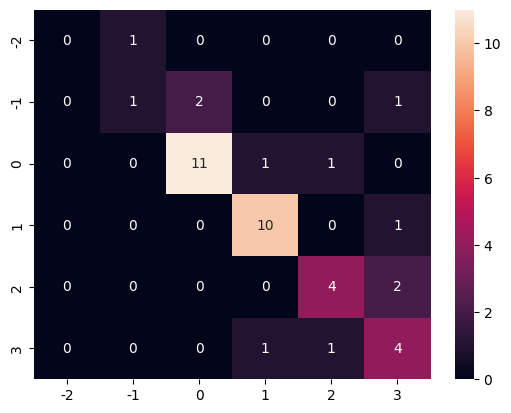

In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), xticklabels=[-2,-1,0,1,2,3], yticklabels = [-2,-1,0,1,2,3],annot = True)
print("The F1Score using DT", f1_score(y_val,y_pred,average= 'macro'))